In [1]:
from src.dlc_practical_prologue import generate_pair_sets
from src.utils import load_class_data, load_target_data, load_all_data, print_param_count, plot_training_epochs
from src.models import *
from src.trainer import Trainer
import numpy as np
import matplotlib.pyplot as plt 
from src.utils import multi_plot_training_epochs

# Look at data

In [2]:
tr_inp, tr_bool, tr_digits, te_inp, te_bool, te_digits = generate_pair_sets(
1000)

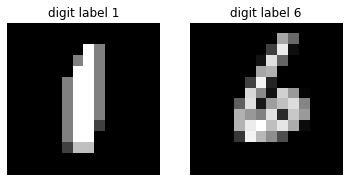

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2)
#fig.suptitle("Class label {}".format(tr_bool[0]))

for i in range(2):
    axes[i].imshow(tr_inp[0][i], cmap="gray")
    axes[i].set_axis_off()
    axes[i].set_title('digit label {}'.format(tr_digits[0][i]))

plt.savefig("figures/data.png", dpi=300)
plt.show()

# Universal Params

In [4]:
nb_epochs = 25
n_cv = 10

## Model 1
- FC baseline

In [5]:
train_losses_fc = []
train_accuracies_fc = []
validation_accuracies_fc = []
test_accuracies_fc = []

In [6]:
trainer = Trainer(nb_epochs=nb_epochs, verbose=False)

results = []
for i in range(10):
    print(f"Run {i+1}/10")
    dl_train_target, dl_val_target, dl_test_target = load_target_data()

    # Model
    model = LinearBaseline()

    # Training
    loss_train, acc_train, acc_val = trainer.fit(model, dl_train_target, dl_val_target, verbose=True)
    train_losses_fc.append(loss_train)
    train_accuracies_fc.append(acc_train)
    validation_accuracies_fc.append(acc_val)
    
    # Testing
    acc_test = trainer.test(model, dl_test_target, test_verbose=False, return_acc=True)
    test_accuracies_fc.append(acc_test)

Run 1/10
# Epoch 1/25:	 loss=0.7	 loss_val=0.65	 acc_val=58.93
# Epoch 2/25:	 loss=0.61	 loss_val=0.58	 acc_val=71.43
# Epoch 3/25:	 loss=0.55	 loss_val=0.55	 acc_val=73.21
# Epoch 4/25:	 loss=0.52	 loss_val=0.53	 acc_val=71.88
# Epoch 5/25:	 loss=0.48	 loss_val=0.52	 acc_val=72.77
# Epoch 6/25:	 loss=0.45	 loss_val=0.5	 acc_val=75.0
# Epoch 7/25:	 loss=0.41	 loss_val=0.49	 acc_val=76.79
# Epoch 8/25:	 loss=0.33	 loss_val=0.52	 acc_val=77.68
# Epoch 9/25:	 loss=0.3	 loss_val=0.51	 acc_val=74.11
# Epoch 10/25:	 loss=0.25	 loss_val=0.59	 acc_val=76.34
# Epoch 11/25:	 loss=0.18	 loss_val=0.57	 acc_val=74.55
# Epoch 12/25:	 loss=0.13	 loss_val=0.61	 acc_val=77.23
# Epoch 13/25:	 loss=0.09	 loss_val=0.66	 acc_val=79.46
# Epoch 14/25:	 loss=0.1	 loss_val=0.76	 acc_val=77.23
# Epoch 15/25:	 loss=0.07	 loss_val=0.69	 acc_val=79.46
# Epoch 16/25:	 loss=0.04	 loss_val=0.84	 acc_val=81.7
# Epoch 17/25:	 loss=0.07	 loss_val=0.75	 acc_val=81.25
# Epoch 18/25:	 loss=0.03	 loss_val=0.84	 acc_val=79.0

# Epoch 24/25:	 loss=0.25	 loss_val=0.71	 acc_val=76.79
# Epoch 25/25:	 loss=0.24	 loss_val=0.91	 acc_val=75.0
Run 7/10
# Epoch 1/25:	 loss=0.68	 loss_val=0.67	 acc_val=55.8
# Epoch 2/25:	 loss=0.63	 loss_val=0.53	 acc_val=82.14
# Epoch 3/25:	 loss=0.5	 loss_val=0.43	 acc_val=83.04
# Epoch 4/25:	 loss=0.41	 loss_val=0.53	 acc_val=80.36
# Epoch 5/25:	 loss=0.41	 loss_val=0.41	 acc_val=81.7
# Epoch 6/25:	 loss=0.3	 loss_val=0.47	 acc_val=80.8
# Epoch 7/25:	 loss=0.26	 loss_val=0.46	 acc_val=77.68
# Epoch 8/25:	 loss=0.21	 loss_val=0.44	 acc_val=80.8
# Epoch 9/25:	 loss=0.15	 loss_val=0.55	 acc_val=79.02
# Epoch 10/25:	 loss=0.13	 loss_val=0.61	 acc_val=83.04
# Epoch 11/25:	 loss=0.1	 loss_val=0.6	 acc_val=82.59
# Epoch 12/25:	 loss=0.08	 loss_val=0.62	 acc_val=82.59
# Epoch 13/25:	 loss=0.06	 loss_val=0.67	 acc_val=82.14
# Epoch 14/25:	 loss=0.04	 loss_val=0.61	 acc_val=82.14
# Epoch 15/25:	 loss=0.03	 loss_val=0.69	 acc_val=85.27
# Epoch 16/25:	 loss=0.02	 loss_val=0.73	 acc_val=84.82
#

In [7]:
train_losses_fc = np.mean(np.array(train_losses_fc), axis=0)
train_accuracies_fc = np.mean(np.array(train_accuracies_fc), axis=0)
validation_accuracies_fc = np.mean(np.array(validation_accuracies_fc), axis=0)

In [8]:
avg_test_acc_fc = np.mean(test_accuracies_fc)
print('avg test acc', avg_test_acc_fc)
stdev_test_acc_fc = np.std(test_accuracies_fc)
print('stdev test acc', stdev_test_acc_fc)

avg test acc 79.708
stdev test acc 1.3557123588726347


## Model 2
- FC with aux loss

In [9]:
test_accuracies_fc_aux = []
train_accuracies_fc_aux = []
validation_accuracies_fc_aux = []
train_losses_fc_aux = []

for i in range(10):
    print(f"Run {i+1}/10")

    # Trainer
    trainer = Trainer(nb_epochs=nb_epochs, verbose=False, run='fc_aux_argmax')

    # Import data
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)

    # Model
    alpha = LinearAlpha()
    beta = LinearBeta(label_encoded=False)
    model = Siamese(alpha, beta, weight_aux=0.5, softmax=False, 
                    argmax=False, strategy='sum')

    # Training
    loss_train, acc_train, acc_val = trainer.fit(model, dl_train_all, dl_val_all, verbose=True)
    train_losses_fc_aux.append(loss_train)
    validation_accuracies_fc_aux.append(acc_val)
    train_accuracies_fc_aux.append(acc_train)
    
    # Testing
    acc = trainer.test(model, dl_test_all, test_verbose=True, return_acc=True)
    test_accuracies_fc_aux.append(acc)

Run 1/10
# Epoch 1/25:	 loss=1.84	 loss_val=0.69	 acc_val=49.55
# Epoch 2/25:	 loss=1.71	 loss_val=0.69	 acc_val=49.55
# Epoch 3/25:	 loss=1.41	 loss_val=0.69	 acc_val=49.55
# Epoch 4/25:	 loss=1.25	 loss_val=0.67	 acc_val=49.55
# Epoch 5/25:	 loss=1.18	 loss_val=0.62	 acc_val=62.95
# Epoch 6/25:	 loss=1.04	 loss_val=0.54	 acc_val=72.77
# Epoch 7/25:	 loss=0.93	 loss_val=0.49	 acc_val=79.46
# Epoch 8/25:	 loss=0.85	 loss_val=0.46	 acc_val=81.7
# Epoch 9/25:	 loss=0.73	 loss_val=0.42	 acc_val=81.7
# Epoch 10/25:	 loss=0.64	 loss_val=0.39	 acc_val=84.38
# Epoch 11/25:	 loss=0.58	 loss_val=0.39	 acc_val=82.59
# Epoch 12/25:	 loss=0.53	 loss_val=0.38	 acc_val=85.27
# Epoch 13/25:	 loss=0.46	 loss_val=0.36	 acc_val=87.05
# Epoch 14/25:	 loss=0.43	 loss_val=0.38	 acc_val=84.38
# Epoch 15/25:	 loss=0.38	 loss_val=0.39	 acc_val=85.71
# Epoch 16/25:	 loss=0.34	 loss_val=0.37	 acc_val=86.61
# Epoch 17/25:	 loss=0.28	 loss_val=0.48	 acc_val=85.71
# Epoch 18/25:	 loss=0.28	 loss_val=0.41	 acc_val=

# Epoch 21/25:	 loss=0.25	 loss_val=0.54	 acc_val=84.38
# Epoch 22/25:	 loss=0.22	 loss_val=0.53	 acc_val=82.14
# Epoch 23/25:	 loss=0.19	 loss_val=0.55	 acc_val=83.48
# Epoch 24/25:	 loss=0.16	 loss_val=0.54	 acc_val=82.59
# Epoch 25/25:	 loss=0.16	 loss_val=0.67	 acc_val=82.59
loss_test=0.66	 acc_test=85.84
Run 7/10
# Epoch 1/25:	 loss=1.84	 loss_val=0.7	 acc_val=54.91
# Epoch 2/25:	 loss=1.71	 loss_val=0.69	 acc_val=54.91
# Epoch 3/25:	 loss=1.56	 loss_val=0.65	 acc_val=60.27
# Epoch 4/25:	 loss=1.38	 loss_val=0.57	 acc_val=74.11
# Epoch 5/25:	 loss=1.2	 loss_val=0.53	 acc_val=76.79
# Epoch 6/25:	 loss=1.08	 loss_val=0.47	 acc_val=76.79
# Epoch 7/25:	 loss=0.96	 loss_val=0.45	 acc_val=77.68
# Epoch 8/25:	 loss=0.88	 loss_val=0.45	 acc_val=76.34
# Epoch 9/25:	 loss=0.81	 loss_val=0.42	 acc_val=79.02
# Epoch 10/25:	 loss=0.75	 loss_val=0.42	 acc_val=79.46
# Epoch 11/25:	 loss=0.71	 loss_val=0.48	 acc_val=79.91
# Epoch 12/25:	 loss=0.64	 loss_val=0.47	 acc_val=79.46
# Epoch 13/25:	 los

In [10]:
train_losses_fc_aux = np.mean(np.array(
                        train_losses_fc_aux), axis=0)
train_accuracies_fc_aux = np.mean(np.array(
                            train_accuracies_fc_aux), axis=0)
validation_accuracies_fc_aux = np.mean(np.array(
                                validation_accuracies_fc_aux), axis=0)

In [11]:
avg_test_acc_fc_aux = np.mean(test_accuracies_fc_aux)
print('avg test acc', avg_test_acc_fc_aux)
stdev_test_acc_fc_aux = np.std(test_accuracies_fc_aux)
print('stdev test acc', stdev_test_acc_fc_aux)

avg test acc 86.22999999999999
stdev test acc 1.8664243890391048


## Plot FC models

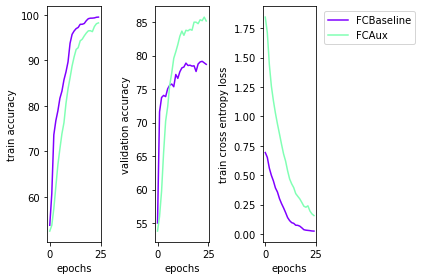

In [12]:
train_losses = [train_losses_fc, train_losses_fc_aux]
train_accuracies = [train_accuracies_fc, train_accuracies_fc_aux]
val_accuracies = [validation_accuracies_fc, validation_accuracies_fc_aux]
labels = ["FCBaseline", "FCAux"]
plt = multi_plot_training_epochs(nb_epochs, train_losses,
                                train_accuracies, val_accuracies,
                                labels, savefig="figures/FC_learning.png")

# Conv models
## Model 4
- Convnet without auxiliary loss

In [13]:
# Train siamese network without aux loss

# Can use any network with ten output nodes here
le_net = LeNet()

# Can use any network with ten input and two output nodes here
linear = nn.Linear(20, 2)

train_losses_convnet = []
train_accuracies_convnet = []
validation_accuracies_convnet = []
test_accuracies_convnet = []

In [14]:
for i in range(n_cv):
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)
    print('cv iter', i)
    siamese_le_net = Siamese(le_net, target=linear, weight_aux=0., strategy="sum",
                            softmax=False, argmax=False)
    trainer = Trainer(nb_epochs=nb_epochs, run="conv_no_aux")

    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses_convnet.append(loss_train)
    train_accuracies_convnet.append(acc_train)
    validation_accuracies_convnet.append(acc_val)
    
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, 
                           return_acc=True)
    test_accuracies_convnet.append(acc_test)

cv iter 0
# Epoch 1/25:	 loss=0.62	 loss_val=0.47	 acc_val=78.57
# Epoch 2/25:	 loss=0.43	 loss_val=0.38	 acc_val=81.25
# Epoch 3/25:	 loss=0.32	 loss_val=0.38	 acc_val=83.48
# Epoch 4/25:	 loss=0.24	 loss_val=0.35	 acc_val=84.38
# Epoch 5/25:	 loss=0.17	 loss_val=0.44	 acc_val=83.48
# Epoch 6/25:	 loss=0.12	 loss_val=0.39	 acc_val=85.27
# Epoch 7/25:	 loss=0.07	 loss_val=0.52	 acc_val=84.82
# Epoch 8/25:	 loss=0.04	 loss_val=0.55	 acc_val=85.71
# Epoch 9/25:	 loss=0.02	 loss_val=0.64	 acc_val=83.93
# Epoch 10/25:	 loss=0.01	 loss_val=0.64	 acc_val=87.05
# Epoch 11/25:	 loss=0.0	 loss_val=0.66	 acc_val=86.61
# Epoch 12/25:	 loss=0.0	 loss_val=0.68	 acc_val=87.05
# Epoch 13/25:	 loss=0.0	 loss_val=0.71	 acc_val=86.61
# Epoch 14/25:	 loss=0.0	 loss_val=0.72	 acc_val=86.61
# Epoch 15/25:	 loss=0.0	 loss_val=0.74	 acc_val=86.61
# Epoch 16/25:	 loss=0.0	 loss_val=0.75	 acc_val=86.61
# Epoch 17/25:	 loss=0.0	 loss_val=0.76	 acc_val=86.61
# Epoch 18/25:	 loss=0.0	 loss_val=0.78	 acc_val=86.61

# Epoch 22/25:	 loss=0.0	 loss_val=0.72	 acc_val=86.16
# Epoch 23/25:	 loss=0.0	 loss_val=0.73	 acc_val=86.16
# Epoch 24/25:	 loss=0.0	 loss_val=0.73	 acc_val=85.71
# Epoch 25/25:	 loss=0.0	 loss_val=0.74	 acc_val=85.71
loss_test=0.73	 acc_test=87.01
cv iter 6
# Epoch 1/25:	 loss=0.59	 loss_val=0.9	 acc_val=82.59
# Epoch 2/25:	 loss=0.2	 loss_val=0.64	 acc_val=85.27
# Epoch 3/25:	 loss=0.12	 loss_val=0.59	 acc_val=85.27
# Epoch 4/25:	 loss=0.07	 loss_val=0.63	 acc_val=86.16
# Epoch 5/25:	 loss=0.04	 loss_val=0.7	 acc_val=86.16
# Epoch 6/25:	 loss=0.03	 loss_val=0.73	 acc_val=85.71
# Epoch 7/25:	 loss=0.02	 loss_val=0.76	 acc_val=86.16
# Epoch 8/25:	 loss=0.01	 loss_val=0.78	 acc_val=85.27
# Epoch 9/25:	 loss=0.01	 loss_val=0.82	 acc_val=86.16
# Epoch 10/25:	 loss=0.0	 loss_val=0.88	 acc_val=86.16
# Epoch 11/25:	 loss=0.0	 loss_val=0.91	 acc_val=86.16
# Epoch 12/25:	 loss=0.0	 loss_val=0.94	 acc_val=86.16
# Epoch 13/25:	 loss=0.0	 loss_val=0.96	 acc_val=86.16
# Epoch 14/25:	 loss=0.0	 l

In [15]:
train_losses_convnet = np.mean(np.array(train_losses_convnet), axis=0)
train_accuracies_convnet = np.mean(np.array(train_accuracies_convnet), axis=0)
validation_accuracies_convnet = np.mean(np.array(validation_accuracies_convnet), axis=0)

In [16]:
avg_test_acc_convnet = np.mean(test_accuracies_convnet)
print('avg test acc', avg_test_acc_convnet)
stdev_test_acc_convnet = np.std(test_accuracies_convnet)
print('stdev test acc', stdev_test_acc_convnet)

avg test acc 86.729
stdev test acc 0.7351795699011251


## Model 4
- Convnet with auxiliary loss

In [17]:
tail_net = nn.Linear(20,2)
weight = 0.8

In [18]:
train_losses_conv_aux = []
train_accuracies_conv_aux = []
validation_accuracies_conv_aux = []
test_accuracies_conv_aux = []

In [19]:
for i in range(n_cv):
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)
    siamese_le_net = Siamese(le_net, 
                                     softmax=False,
                                     argmax=False,
                                     strategy="sum",
                                     target=tail_net, 
                                     weight_aux=weight)
    trainer = Trainer(nb_epochs=nb_epochs)
    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses_conv_aux.append(loss_train)
    train_accuracies_conv_aux.append(acc_train)
    validation_accuracies_conv_aux.append(acc_val)
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
    test_accuracies_conv_aux.append(acc_test)

# Epoch 1/25:	 loss=3.83	 loss_val=0.69	 acc_val=54.91
# Epoch 2/25:	 loss=2.43	 loss_val=0.68	 acc_val=61.16
# Epoch 3/25:	 loss=2.23	 loss_val=0.68	 acc_val=62.5
# Epoch 4/25:	 loss=2.03	 loss_val=0.68	 acc_val=61.16
# Epoch 5/25:	 loss=1.77	 loss_val=0.67	 acc_val=61.61
# Epoch 6/25:	 loss=1.48	 loss_val=0.62	 acc_val=65.62
# Epoch 7/25:	 loss=1.21	 loss_val=0.51	 acc_val=75.89
# Epoch 8/25:	 loss=1.0	 loss_val=0.44	 acc_val=78.57
# Epoch 9/25:	 loss=0.86	 loss_val=0.39	 acc_val=82.14
# Epoch 10/25:	 loss=0.75	 loss_val=0.35	 acc_val=83.93
# Epoch 11/25:	 loss=0.68	 loss_val=0.32	 acc_val=87.5
# Epoch 12/25:	 loss=0.6	 loss_val=0.3	 acc_val=88.84
# Epoch 13/25:	 loss=0.55	 loss_val=0.28	 acc_val=88.84
# Epoch 14/25:	 loss=0.49	 loss_val=0.26	 acc_val=89.73
# Epoch 15/25:	 loss=0.45	 loss_val=0.25	 acc_val=91.52
# Epoch 16/25:	 loss=0.41	 loss_val=0.26	 acc_val=89.73
# Epoch 17/25:	 loss=0.38	 loss_val=0.25	 acc_val=90.62
# Epoch 18/25:	 loss=0.34	 loss_val=0.27	 acc_val=85.71
# Epoc

# Epoch 22/25:	 loss=0.01	 loss_val=0.36	 acc_val=91.07
# Epoch 23/25:	 loss=0.01	 loss_val=0.37	 acc_val=91.52
# Epoch 24/25:	 loss=0.01	 loss_val=0.37	 acc_val=91.52
# Epoch 25/25:	 loss=0.01	 loss_val=0.37	 acc_val=91.52
loss_test=0.46	 acc_test=89.65
# Epoch 1/25:	 loss=0.65	 loss_val=0.55	 acc_val=83.93
# Epoch 2/25:	 loss=0.34	 loss_val=0.43	 acc_val=85.71
# Epoch 3/25:	 loss=0.21	 loss_val=0.4	 acc_val=87.5
# Epoch 4/25:	 loss=0.14	 loss_val=0.39	 acc_val=88.84
# Epoch 5/25:	 loss=0.1	 loss_val=0.39	 acc_val=88.84
# Epoch 6/25:	 loss=0.08	 loss_val=0.41	 acc_val=87.05
# Epoch 7/25:	 loss=0.06	 loss_val=0.41	 acc_val=88.84
# Epoch 8/25:	 loss=0.06	 loss_val=0.42	 acc_val=87.5
# Epoch 9/25:	 loss=0.05	 loss_val=0.48	 acc_val=86.61
# Epoch 10/25:	 loss=0.04	 loss_val=0.44	 acc_val=86.61
# Epoch 11/25:	 loss=0.03	 loss_val=0.47	 acc_val=86.61
# Epoch 12/25:	 loss=0.02	 loss_val=0.47	 acc_val=86.16
# Epoch 13/25:	 loss=0.02	 loss_val=0.48	 acc_val=86.61
# Epoch 14/25:	 loss=0.02	 los

In [20]:
train_losses_conv_aux = np.mean(np.array(train_losses_conv_aux), axis=0)
train_accuracies_conv_aux = np.mean(np.array(train_accuracies_conv_aux), axis=0)
validation_accuracies_conv_aux = np.mean(np.array(validation_accuracies_conv_aux), axis=0)

In [21]:
avg_test_acc_conv_aux = np.mean(test_accuracies_conv_aux)
stdev_test_acc_conv_aux = np.std(test_accuracies_conv_aux)
print('avg test acc', avg_test_acc_conv_aux)
print('stdev', stdev_test_acc_conv_aux)

avg test acc 88.03699999999999
stdev 1.973849285026595


## Model 5
- Direct digit prediction

In [22]:
train_accuracies_digits = []
train_losses_digits = []
validation_accuracies_digits = []
test_accuracies_digits = []

In [23]:
for i in range(n_cv):
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)
    print('cv iter', i)
    siamese_le_net = Siamese(le_net, target=None, softmax=False,
                             argmax=False, strategy="sum", 
                             weight_aux=0.)
    trainer = Trainer(nb_epochs=nb_epochs)

    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses_digits.append(loss_train)
    train_accuracies_digits.append(acc_train)
    validation_accuracies_digits.append(acc_val)
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
    
    test_accuracies_digits.append(acc_test)

cv iter 0
# Epoch 1/25:	 loss=0.22	 loss_val=0.11	 acc_val=99.55
# Epoch 2/25:	 loss=0.11	 loss_val=0.08	 acc_val=98.21
# Epoch 3/25:	 loss=0.06	 loss_val=0.07	 acc_val=98.66
# Epoch 4/25:	 loss=0.03	 loss_val=0.09	 acc_val=99.55
# Epoch 5/25:	 loss=0.02	 loss_val=0.07	 acc_val=98.66
# Epoch 6/25:	 loss=0.02	 loss_val=0.07	 acc_val=98.21
# Epoch 7/25:	 loss=0.01	 loss_val=0.06	 acc_val=98.66
# Epoch 8/25:	 loss=0.01	 loss_val=0.06	 acc_val=99.11
# Epoch 9/25:	 loss=0.0	 loss_val=0.06	 acc_val=98.66
# Epoch 10/25:	 loss=0.0	 loss_val=0.06	 acc_val=98.66
# Epoch 11/25:	 loss=0.0	 loss_val=0.06	 acc_val=98.66
# Epoch 12/25:	 loss=0.0	 loss_val=0.06	 acc_val=98.66
# Epoch 13/25:	 loss=0.0	 loss_val=0.06	 acc_val=98.66
# Epoch 14/25:	 loss=0.0	 loss_val=0.06	 acc_val=98.66
# Epoch 15/25:	 loss=0.0	 loss_val=0.06	 acc_val=98.66
# Epoch 16/25:	 loss=0.0	 loss_val=0.06	 acc_val=98.66
# Epoch 17/25:	 loss=0.0	 loss_val=0.06	 acc_val=98.66
# Epoch 18/25:	 loss=0.0	 loss_val=0.06	 acc_val=98.66
#

# Epoch 22/25:	 loss=0.0	 loss_val=0.1	 acc_val=96.43
# Epoch 23/25:	 loss=0.0	 loss_val=0.1	 acc_val=96.43
# Epoch 24/25:	 loss=0.0	 loss_val=0.1	 acc_val=96.43
# Epoch 25/25:	 loss=0.0	 loss_val=0.1	 acc_val=96.43
loss_test=0.1	 acc_test=98.05
cv iter 6
# Epoch 1/25:	 loss=0.1	 loss_val=0.03	 acc_val=99.11
# Epoch 2/25:	 loss=0.05	 loss_val=0.05	 acc_val=99.11
# Epoch 3/25:	 loss=0.04	 loss_val=0.07	 acc_val=99.11
# Epoch 4/25:	 loss=0.01	 loss_val=0.05	 acc_val=99.55
# Epoch 5/25:	 loss=0.01	 loss_val=0.06	 acc_val=99.55
# Epoch 6/25:	 loss=0.0	 loss_val=0.06	 acc_val=99.11
# Epoch 7/25:	 loss=0.0	 loss_val=0.05	 acc_val=99.55
# Epoch 8/25:	 loss=0.0	 loss_val=0.06	 acc_val=99.55
# Epoch 9/25:	 loss=0.0	 loss_val=0.05	 acc_val=99.11
# Epoch 10/25:	 loss=0.0	 loss_val=0.06	 acc_val=99.11
# Epoch 11/25:	 loss=0.0	 loss_val=0.06	 acc_val=99.11
# Epoch 12/25:	 loss=0.0	 loss_val=0.06	 acc_val=99.11
# Epoch 13/25:	 loss=0.0	 loss_val=0.06	 acc_val=99.11
# Epoch 14/25:	 loss=0.0	 loss_val

In [24]:
train_losses_digits = np.mean(np.array(train_losses_digits), axis=0)
train_accuracies_digits = np.mean(np.array(train_accuracies_digits),
                                 axis=0)
validation_accuracies_digits = np.mean(np.array(validation_accuracies_digits),
                                      axis=0)

In [25]:
avg_test_acc_digits = np.mean(test_accuracies_digits)
stdev_test_acc_digits = np.std(test_accuracies_digits)
print('test acc', avg_test_acc_digits)
print('stdev', stdev_test_acc_digits)

test acc 98.26299999999999
stdev 0.34429783618257265


## Model 6
- convnet with aux loss and tailnet

In [26]:
weight=0.6

In [27]:
test_accuracies_conv_tail = []
train_losses_conv_tail = []
train_accuracies_conv_tail = []
validation_accuracies_conv_tail = []

In [28]:
for i in range(n_cv):
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)
    le_net = LeNet()
    tail_net = TailLinear(label_encoded=False)
    siamese_le_net = Siamese(le_net, 
                            target=tail_net, 
                            weight_aux=weight,
                            softmax=False,
                            argmax=False,
                            strategy='sum')
    trainer = Trainer(nb_epochs=nb_epochs)
    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses_conv_tail.append(loss_train)
    train_accuracies_conv_tail.append(acc_train)
    validation_accuracies_conv_tail.append(acc_val)
    
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
    test_accuracies_conv_tail.append(acc_test)

# Epoch 1/25:	 loss=1.81	 loss_val=0.61	 acc_val=69.64
# Epoch 2/25:	 loss=1.01	 loss_val=0.51	 acc_val=74.11
# Epoch 3/25:	 loss=0.66	 loss_val=0.35	 acc_val=83.93
# Epoch 4/25:	 loss=0.5	 loss_val=0.33	 acc_val=89.29
# Epoch 5/25:	 loss=0.4	 loss_val=0.34	 acc_val=87.05
# Epoch 6/25:	 loss=0.33	 loss_val=0.29	 acc_val=88.39
# Epoch 7/25:	 loss=0.23	 loss_val=0.25	 acc_val=89.73
# Epoch 8/25:	 loss=0.19	 loss_val=0.37	 acc_val=88.84
# Epoch 9/25:	 loss=0.12	 loss_val=0.33	 acc_val=87.95
# Epoch 10/25:	 loss=0.1	 loss_val=0.47	 acc_val=89.73
# Epoch 11/25:	 loss=0.07	 loss_val=0.43	 acc_val=88.84
# Epoch 12/25:	 loss=0.06	 loss_val=0.48	 acc_val=91.52
# Epoch 13/25:	 loss=0.05	 loss_val=0.41	 acc_val=90.62
# Epoch 14/25:	 loss=0.03	 loss_val=0.45	 acc_val=91.07
# Epoch 15/25:	 loss=0.03	 loss_val=0.53	 acc_val=89.73
# Epoch 16/25:	 loss=0.03	 loss_val=0.54	 acc_val=91.07
# Epoch 17/25:	 loss=0.02	 loss_val=0.54	 acc_val=91.52
# Epoch 18/25:	 loss=0.02	 loss_val=0.59	 acc_val=91.07
# Ep

# Epoch 22/25:	 loss=0.02	 loss_val=0.58	 acc_val=87.5
# Epoch 23/25:	 loss=0.02	 loss_val=0.62	 acc_val=89.29
# Epoch 24/25:	 loss=0.01	 loss_val=0.6	 acc_val=87.5
# Epoch 25/25:	 loss=0.01	 loss_val=0.63	 acc_val=88.84
loss_test=0.55	 acc_test=90.23
# Epoch 1/25:	 loss=1.87	 loss_val=0.66	 acc_val=54.02
# Epoch 2/25:	 loss=1.06	 loss_val=0.43	 acc_val=76.34
# Epoch 3/25:	 loss=0.69	 loss_val=0.37	 acc_val=81.7
# Epoch 4/25:	 loss=0.51	 loss_val=0.34	 acc_val=81.25
# Epoch 5/25:	 loss=0.36	 loss_val=0.29	 acc_val=86.61
# Epoch 6/25:	 loss=0.3	 loss_val=0.28	 acc_val=85.71
# Epoch 7/25:	 loss=0.23	 loss_val=0.31	 acc_val=86.61
# Epoch 8/25:	 loss=0.18	 loss_val=0.29	 acc_val=87.95
# Epoch 9/25:	 loss=0.2	 loss_val=0.3	 acc_val=88.39
# Epoch 10/25:	 loss=0.14	 loss_val=0.34	 acc_val=87.05
# Epoch 11/25:	 loss=0.1	 loss_val=0.3	 acc_val=87.05
# Epoch 12/25:	 loss=0.08	 loss_val=0.36	 acc_val=87.95
# Epoch 13/25:	 loss=0.06	 loss_val=0.31	 acc_val=90.18
# Epoch 14/25:	 loss=0.05	 loss_val

In [29]:
avg_test_acc_conv_tail = np.mean(test_accuracies_conv_tail)
stdev_test_acc_conv_tail = np.std(test_accuracies_conv_tail)
print('avg test acc', avg_test_acc_conv_tail)
print('stdev test acc', stdev_test_acc_conv_tail)

avg test acc 91.024
stdev test acc 0.5135990654197093


In [30]:
train_losses_conv_tail = np.mean(np.array(train_losses_conv_tail), axis=0)
train_accuracies_conv_tail = np.mean(np.array(train_accuracies_conv_tail), axis=0)
validation_accuracies_conv_tail = np.mean(np.array(validation_accuracies_conv_tail), axis=0)

## Model 7 
- softmax in convnet

In [31]:
weight = 0.6
test_accuracies_tailnet_softmax = []
train_losses_tailnet_softmax = []
train_accuracies_tailnet_softmax = []
validation_accuracies_tailnet_softmax = []

In [32]:
for i in range(n_cv):
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)
    le_net = LeNet()
    tail_net = TailLinear(label_encoded=False)
    siamese_le_net = Siamese(le_net, 
                            target=tail_net, 
                            weight_aux=weight,
                            strategy='sum',
                            softmax=True,
                            argmax=False)
    trainer = Trainer(nb_epochs=nb_epochs)
    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses_tailnet_softmax.append(loss_train)
    train_accuracies_tailnet_softmax.append(acc_train)
    validation_accuracies_tailnet_softmax.append(acc_val)
    
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
    test_accuracies_tailnet_softmax.append(acc_test)

# Epoch 1/25:	 loss=2.02	 loss_val=0.7	 acc_val=49.55
# Epoch 2/25:	 loss=1.76	 loss_val=0.62	 acc_val=61.16
# Epoch 3/25:	 loss=1.59	 loss_val=0.48	 acc_val=78.12
# Epoch 4/25:	 loss=1.46	 loss_val=0.38	 acc_val=81.7
# Epoch 5/25:	 loss=1.38	 loss_val=0.29	 acc_val=88.39
# Epoch 6/25:	 loss=1.33	 loss_val=0.28	 acc_val=87.5
# Epoch 7/25:	 loss=1.29	 loss_val=0.29	 acc_val=88.39
# Epoch 8/25:	 loss=1.28	 loss_val=0.26	 acc_val=87.05
# Epoch 9/25:	 loss=1.22	 loss_val=0.22	 acc_val=91.52
# Epoch 10/25:	 loss=1.18	 loss_val=0.24	 acc_val=93.3
# Epoch 11/25:	 loss=1.15	 loss_val=0.2	 acc_val=91.96
# Epoch 12/25:	 loss=1.11	 loss_val=0.26	 acc_val=91.52
# Epoch 13/25:	 loss=1.11	 loss_val=0.21	 acc_val=92.86
# Epoch 14/25:	 loss=1.06	 loss_val=0.22	 acc_val=93.75
# Epoch 15/25:	 loss=1.04	 loss_val=0.15	 acc_val=95.54
# Epoch 16/25:	 loss=1.04	 loss_val=0.17	 acc_val=93.75
# Epoch 17/25:	 loss=1.04	 loss_val=0.26	 acc_val=93.3
# Epoch 18/25:	 loss=1.07	 loss_val=0.24	 acc_val=92.86
# Epoch

# Epoch 22/25:	 loss=0.92	 loss_val=0.24	 acc_val=95.98
# Epoch 23/25:	 loss=0.92	 loss_val=0.25	 acc_val=95.98
# Epoch 24/25:	 loss=0.91	 loss_val=0.25	 acc_val=95.98
# Epoch 25/25:	 loss=0.91	 loss_val=0.25	 acc_val=96.43
loss_test=0.18	 acc_test=96.29
# Epoch 1/25:	 loss=2.02	 loss_val=0.68	 acc_val=53.12
# Epoch 2/25:	 loss=1.82	 loss_val=0.61	 acc_val=68.75
# Epoch 3/25:	 loss=1.64	 loss_val=0.46	 acc_val=81.25
# Epoch 4/25:	 loss=1.44	 loss_val=0.4	 acc_val=81.25
# Epoch 5/25:	 loss=1.35	 loss_val=0.27	 acc_val=87.95
# Epoch 6/25:	 loss=1.28	 loss_val=0.3	 acc_val=87.5
# Epoch 7/25:	 loss=1.22	 loss_val=0.31	 acc_val=88.39
# Epoch 8/25:	 loss=1.19	 loss_val=0.28	 acc_val=88.84
# Epoch 9/25:	 loss=1.19	 loss_val=0.25	 acc_val=88.84
# Epoch 10/25:	 loss=1.17	 loss_val=0.22	 acc_val=89.73
# Epoch 11/25:	 loss=1.13	 loss_val=0.19	 acc_val=91.07
# Epoch 12/25:	 loss=1.12	 loss_val=0.18	 acc_val=92.86
# Epoch 13/25:	 loss=1.09	 loss_val=0.2	 acc_val=90.18
# Epoch 14/25:	 loss=1.13	 los

In [33]:
avg_test_acc_tailnet_softmax = np.mean(test_accuracies_tailnet_softmax)
stdev_test_acc_tailnet_softmax = np.std(test_accuracies_tailnet_softmax)
print('avg test acc', avg_test_acc_tailnet_softmax)
print('stdev test acc', stdev_test_acc_tailnet_softmax)

avg test acc 94.639
stdev test acc 3.124414985241237


In [34]:
train_losses_tailnet_softmax = np.mean(np.array(train_losses_tailnet_softmax),
                                      axis=0)
train_accuracies_tailnet_softmax = np.mean(np.array(train_accuracies_tailnet_softmax),
                                          axis=0)
validation_accuracies_tailnet_softmax = np.mean(np.array(validation_accuracies_tailnet_softmax),
                                               axis=0)

## Model 8 
-argmax in convnet

In [35]:
best_weight = 0.6
test_accuracies_tailnet_argmax = []
train_losses_tailnet_argmax = []
train_accuracies_tailnet_argmax = []
validation_accuracies_tailnet_argmax = []

In [36]:
for i in range(n_cv):
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)
    le_net = LeNet()
    tail_net = TailLinear(label_encoded=True)
    siamese_le_net = Siamese(le_net, 
                            target=tail_net, 
                            weight_aux=best_weight,
                            strategy='sum',
                            softmax=False,
                            argmax=True)
    trainer = Trainer(nb_epochs=nb_epochs)
    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses_tailnet_argmax.append(loss_train)
    train_accuracies_tailnet_argmax.append(acc_train)
    validation_accuracies_tailnet_argmax.append(acc_val)
    
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
    test_accuracies_tailnet_argmax.append(acc_test)

# Epoch 1/25:	 loss=1.86	 loss_val=0.67	 acc_val=66.96
# Epoch 2/25:	 loss=1.12	 loss_val=0.56	 acc_val=83.93
# Epoch 3/25:	 loss=0.71	 loss_val=0.37	 acc_val=85.71
# Epoch 4/25:	 loss=0.46	 loss_val=0.28	 acc_val=94.2
# Epoch 5/25:	 loss=0.36	 loss_val=0.31	 acc_val=90.62
# Epoch 6/25:	 loss=0.36	 loss_val=0.26	 acc_val=94.64
# Epoch 7/25:	 loss=0.27	 loss_val=0.27	 acc_val=94.64
# Epoch 8/25:	 loss=0.25	 loss_val=0.21	 acc_val=95.54
# Epoch 9/25:	 loss=0.19	 loss_val=0.18	 acc_val=96.88
# Epoch 10/25:	 loss=0.15	 loss_val=0.18	 acc_val=95.98
# Epoch 11/25:	 loss=0.15	 loss_val=0.21	 acc_val=93.3
# Epoch 12/25:	 loss=0.1	 loss_val=0.29	 acc_val=93.75
# Epoch 13/25:	 loss=0.11	 loss_val=0.25	 acc_val=94.64
# Epoch 14/25:	 loss=0.08	 loss_val=0.28	 acc_val=93.3
# Epoch 15/25:	 loss=0.07	 loss_val=0.16	 acc_val=97.77
# Epoch 16/25:	 loss=0.06	 loss_val=0.38	 acc_val=94.2
# Epoch 17/25:	 loss=0.06	 loss_val=0.37	 acc_val=93.3
# Epoch 18/25:	 loss=0.04	 loss_val=0.28	 acc_val=95.09
# Epoch

# Epoch 22/25:	 loss=0.01	 loss_val=0.17	 acc_val=98.21
# Epoch 23/25:	 loss=0.01	 loss_val=0.15	 acc_val=98.66
# Epoch 24/25:	 loss=0.0	 loss_val=0.13	 acc_val=98.66
# Epoch 25/25:	 loss=0.0	 loss_val=0.16	 acc_val=98.66
loss_test=0.16	 acc_test=97.95
# Epoch 1/25:	 loss=1.86	 loss_val=0.69	 acc_val=48.66
# Epoch 2/25:	 loss=1.15	 loss_val=0.6	 acc_val=63.39
# Epoch 3/25:	 loss=0.73	 loss_val=0.41	 acc_val=89.73
# Epoch 4/25:	 loss=0.5	 loss_val=0.26	 acc_val=93.3
# Epoch 5/25:	 loss=0.34	 loss_val=0.19	 acc_val=96.88
# Epoch 6/25:	 loss=0.28	 loss_val=0.13	 acc_val=98.66
# Epoch 7/25:	 loss=0.21	 loss_val=0.15	 acc_val=97.77
# Epoch 8/25:	 loss=0.18	 loss_val=0.11	 acc_val=98.21
# Epoch 9/25:	 loss=0.14	 loss_val=0.08	 acc_val=98.66
# Epoch 10/25:	 loss=0.12	 loss_val=0.08	 acc_val=98.66
# Epoch 11/25:	 loss=0.11	 loss_val=0.09	 acc_val=98.21
# Epoch 12/25:	 loss=0.07	 loss_val=0.11	 acc_val=98.21
# Epoch 13/25:	 loss=0.06	 loss_val=0.14	 acc_val=96.88
# Epoch 14/25:	 loss=0.05	 loss

In [37]:
avg_test_acc_tailnet_argmax = np.mean(test_accuracies_tailnet_argmax)
stdev_test_acc_tailnet_argmax = np.std(test_accuracies_tailnet_argmax)
print('avg test acc', avg_test_acc_tailnet_argmax)
print('stdev test acc', stdev_test_acc_tailnet_argmax)

avg test acc 97.225
stdev test acc 0.6702574132376319


In [38]:
train_losses_tailnet_argmax = np.mean(np.array(train_losses_tailnet_argmax),
                                      axis=0)
train_accuracies_tailnet_argmax = np.mean(np.array(train_accuracies_tailnet_argmax),
                                          axis=0)
validation_accuracies_tailnet_argmax = np.mean(np.array(validation_accuracies_tailnet_argmax),
                                               axis=0)

## Plot conv models

In [39]:
# convnet
# conv_aux
# digits
# conv_tail
# tailnet_softmax
# tailnet_argmax

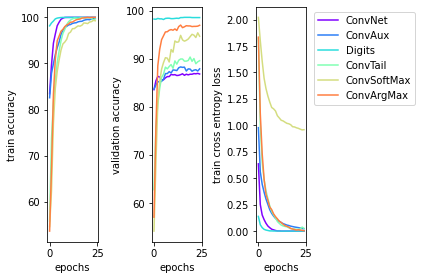

In [40]:
train_losses = [train_losses_convnet, 
                train_losses_conv_aux,
               train_losses_digits,
               train_losses_conv_tail,
               train_losses_tailnet_softmax,
               train_losses_tailnet_argmax]
train_accuracies = [train_accuracies_convnet,
                   train_accuracies_conv_aux,
                   train_accuracies_digits,
                   train_accuracies_conv_tail,
                   train_accuracies_tailnet_softmax,
                   train_accuracies_tailnet_argmax]
val_accuracies = [validation_accuracies_convnet,
                 validation_accuracies_conv_aux,
                 validation_accuracies_digits,
                 validation_accuracies_conv_tail,
                 validation_accuracies_tailnet_softmax,
                 validation_accuracies_tailnet_argmax]
labels = ["ConvNet",
         "ConvAux",
         "Digits",
         "ConvTail",
         "ConvSoftMax",
         "ConvArgMax"]
plt = multi_plot_training_epochs(nb_epochs, train_losses,
                                train_accuracies, val_accuracies,
                                labels, savefig="figures/conv_learning.png")